In this notebbok we are focusing on water detection on the image pre and post disater  using a thresolding approach we are using 4 thresholds : Ostu Standard deviation, Triangle and Threshold_minimum

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters
from PIL import Image
from skimage.filters import threshold_minimum, threshold_triangle
from skimage import io
from PIL import Image

In [2]:
# Open the image using Image.open()
image_pre = Image.open("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/part_1_2023-06-27_Sentinel-1_IW(VV+VH)-VV_-_decibel_gamma0.tiff")
image_post = Image.open("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/part_1_2023-09-07_Sentinel-1_IW(VV+VH) - VV_-_decibel_gamma0.tiff")

Threshold post disaster

In [3]:
# Convert the image to grayscale (for optical images RGB)
gray_image_pre = cv2.imread("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/part_1_2023-06-27_Sentinel-1_IW(VV+VH)-VV_-_decibel_gamma0.tiff", cv2.IMREAD_GRAYSCALE)
gray_image_post = cv2.imread("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/part_1_2023-09-07_Sentinel-1_IW(VV+VH) - VV_-_decibel_gamma0.tiff", cv2.IMREAD_GRAYSCALE)

In [4]:
#Triangle
threshold_triangle_value_post=filters.threshold_triangle(gray_image_post)
print("threshold_value :",threshold_triangle_value_post)

threshold_value : 1


In [5]:
#Otsu
threshold_otsu_post = filters.threshold_otsu(gray_image_post)
print("threshold_value :",threshold_otsu_post)

threshold_value : 93


In [6]:
#standar deviation
std_post= np.std(gray_image_post)
print("threshold_standardeviation :",std_post)

threshold_standardeviation : 51.35820700826328


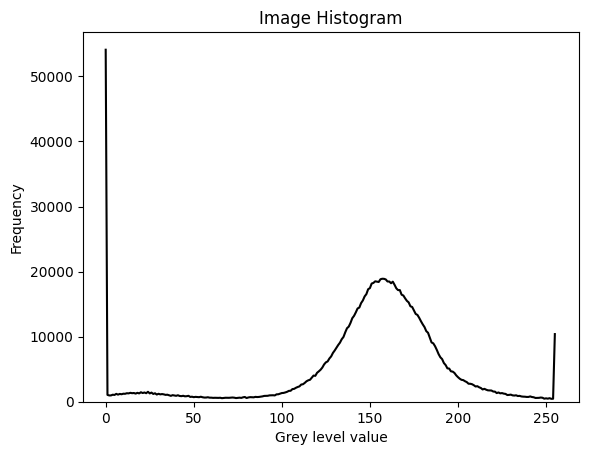

In [7]:
# Calculate the histogram
hist_post = cv2.calcHist([gray_image_post], [0], None, [256], [0, 256])

# Plot the histogram with grey bars and a curve
plt.hist(hist_post.ravel(), bins=256, range=[0, 256], color='grey', alpha=0.7)
plt.plot(hist_post, color='black')

plt.title('Image Histogram')
plt.xlabel('Grey level value')
plt.ylabel('Frequency')
plt.show()

In [8]:
threshold_minimum= threshold_minimum(hist_post)
print(threshold_minimum)

12077.369


Threshold grey value :  139


Text(0, 0.5, 'Frequency')

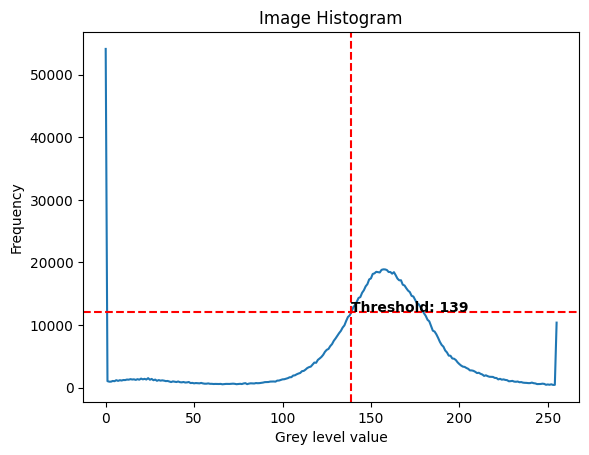

In [9]:
# Calculate the histogram
hist_post = cv2.calcHist([gray_image_post], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist_post)

# Draw a horizontal line at Y=1000
plt.axhline(y=threshold_minimum , color='r', linestyle='--')

# Find the points where the line intersects with the histogram plot
intersections = []
for i in range(len(hist_post)):
    if hist_post[i] >= threshold_minimum :
        intersections.append(i)
threshold_Grey_level_value_post=intersections[1]
# Print the intensity levels where the line intersects with the histogram plot
print('Threshold grey value : ', intersections[1])
# Plot the vertical red line 
plt.axvline(x= threshold_Grey_level_value_post, color='r', linestyle='--')  

# Add the threshold value as label  
plt.text(threshold_Grey_level_value_post, threshold_minimum , f'Threshold: {threshold_Grey_level_value_post}',  
             color='black', fontweight='bold')
# Show the plot
#plt.text(threshold_Grey_level_value, threshold, f'Threshold: {threshold_Grey_level_value}', color='b')
plt.title('Image Histogram')
plt.xlabel('Grey level value')
plt.ylabel('Frequency')

Threshold pre disaster

In [10]:
threshold_triangle_value_pre=filters.threshold_triangle(gray_image_pre)
print("threshold_value :",threshold_triangle_value_pre)

threshold_value : 71


In [11]:
threshold_otsu_pre = filters.threshold_otsu(gray_image_pre)
print("threshold_value :",threshold_otsu_pre)

threshold_value : 130


In [12]:
std_pre= np.std(gray_image_pre)
print("threshold_standar deviation :",std_pre)

threshold_standar deviation : 37.43758821775381


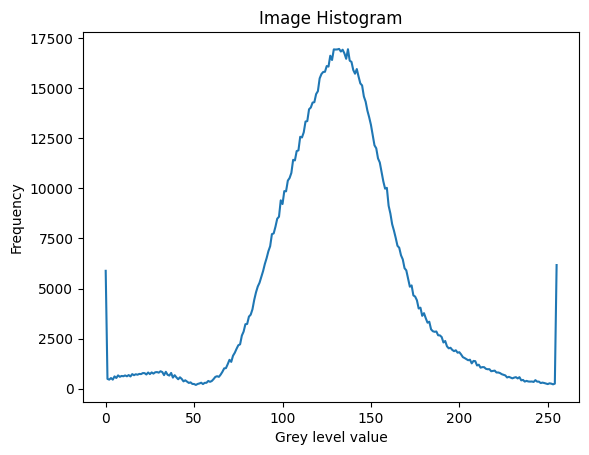

In [17]:
#histogramm
# Load the image in grayscale check the histogram an the pixel distribution
gray_image_pre= cv2.imread("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/part_1_2023-06-27_Sentinel-1_IW(VV+VH)-VV_-_decibel_gamma0.tiff", cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist_pre= cv2.calcHist([gray_image_pre], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist_pre)
plt.title('Image Histogram')
plt.xlabel('Grey level value')
plt.ylabel('Frequency')
plt.show()


In [20]:
threshold_minimum_pre = threshold_minimum(hist_pre)
print(threshold_minimum_pre)

8999.75


Threshold grey value :  100


Text(0, 0.5, 'Frequency')

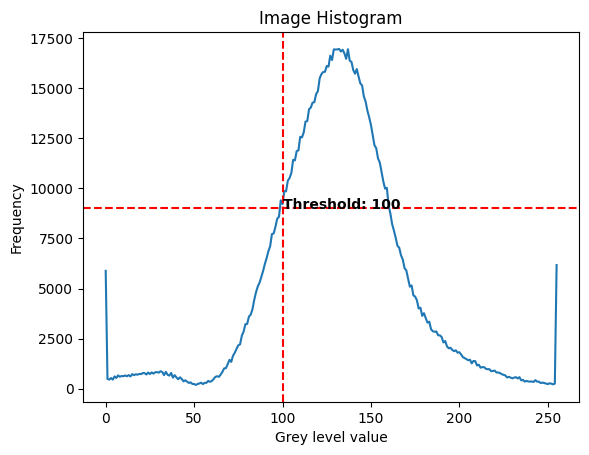

In [22]:
# Calculate the histogram
hist_pre = cv2.calcHist([gray_image_pre], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist_pre)

# Draw a horizontal line at Y=1000
plt.axhline(y=threshold_minimum_pre, color='r', linestyle='--')

# Find the points where the line intersects with the histogram plot
intersections = []
for i in range(len(hist_pre)):
    if hist_pre[i] >= threshold_minimum_pre:
        intersections.append(i)
threshold_Grey_level_value_pre=intersections[1]
# Print the intensity levels where the line intersects with the histogram plot
print('Threshold grey value : ', intersections[1])
# Plot the vertical red line 
plt.axvline(x= threshold_Grey_level_value_pre, color='r', linestyle='--')  

# Add the threshold value as label  
plt.text(threshold_Grey_level_value_pre, threshold_minimum_pre, f'Threshold: {threshold_Grey_level_value_pre}',  
             color='black', fontweight='bold')
# Show the plot
#plt.text(threshold_Grey_level_value, threshold, f'Threshold: {threshold_Grey_level_value}', color='b')
plt.title('Image Histogram')
plt.xlabel('Grey level value')
plt.ylabel('Frequency')

Water detection pre and post disater

In [21]:
X_water_pre = []
Y_water_pre = []
intensity_values_pixels = []

for y in range(gray_image_pre.shape[0]):
    for x in range(gray_image_pre.shape[1]):

        # Check if the pixel than the threshold, you can change the threshold to test each time 
        if (gray_image_pre[y, x]  <std_pre).all():
            
            
            X_water_pre.append(x)
            Y_water_pre.append(y)
        else:
            intensity_values_pixels.append(0)
            X_water_pre.append(0)
            Y_water_pre.append(0)


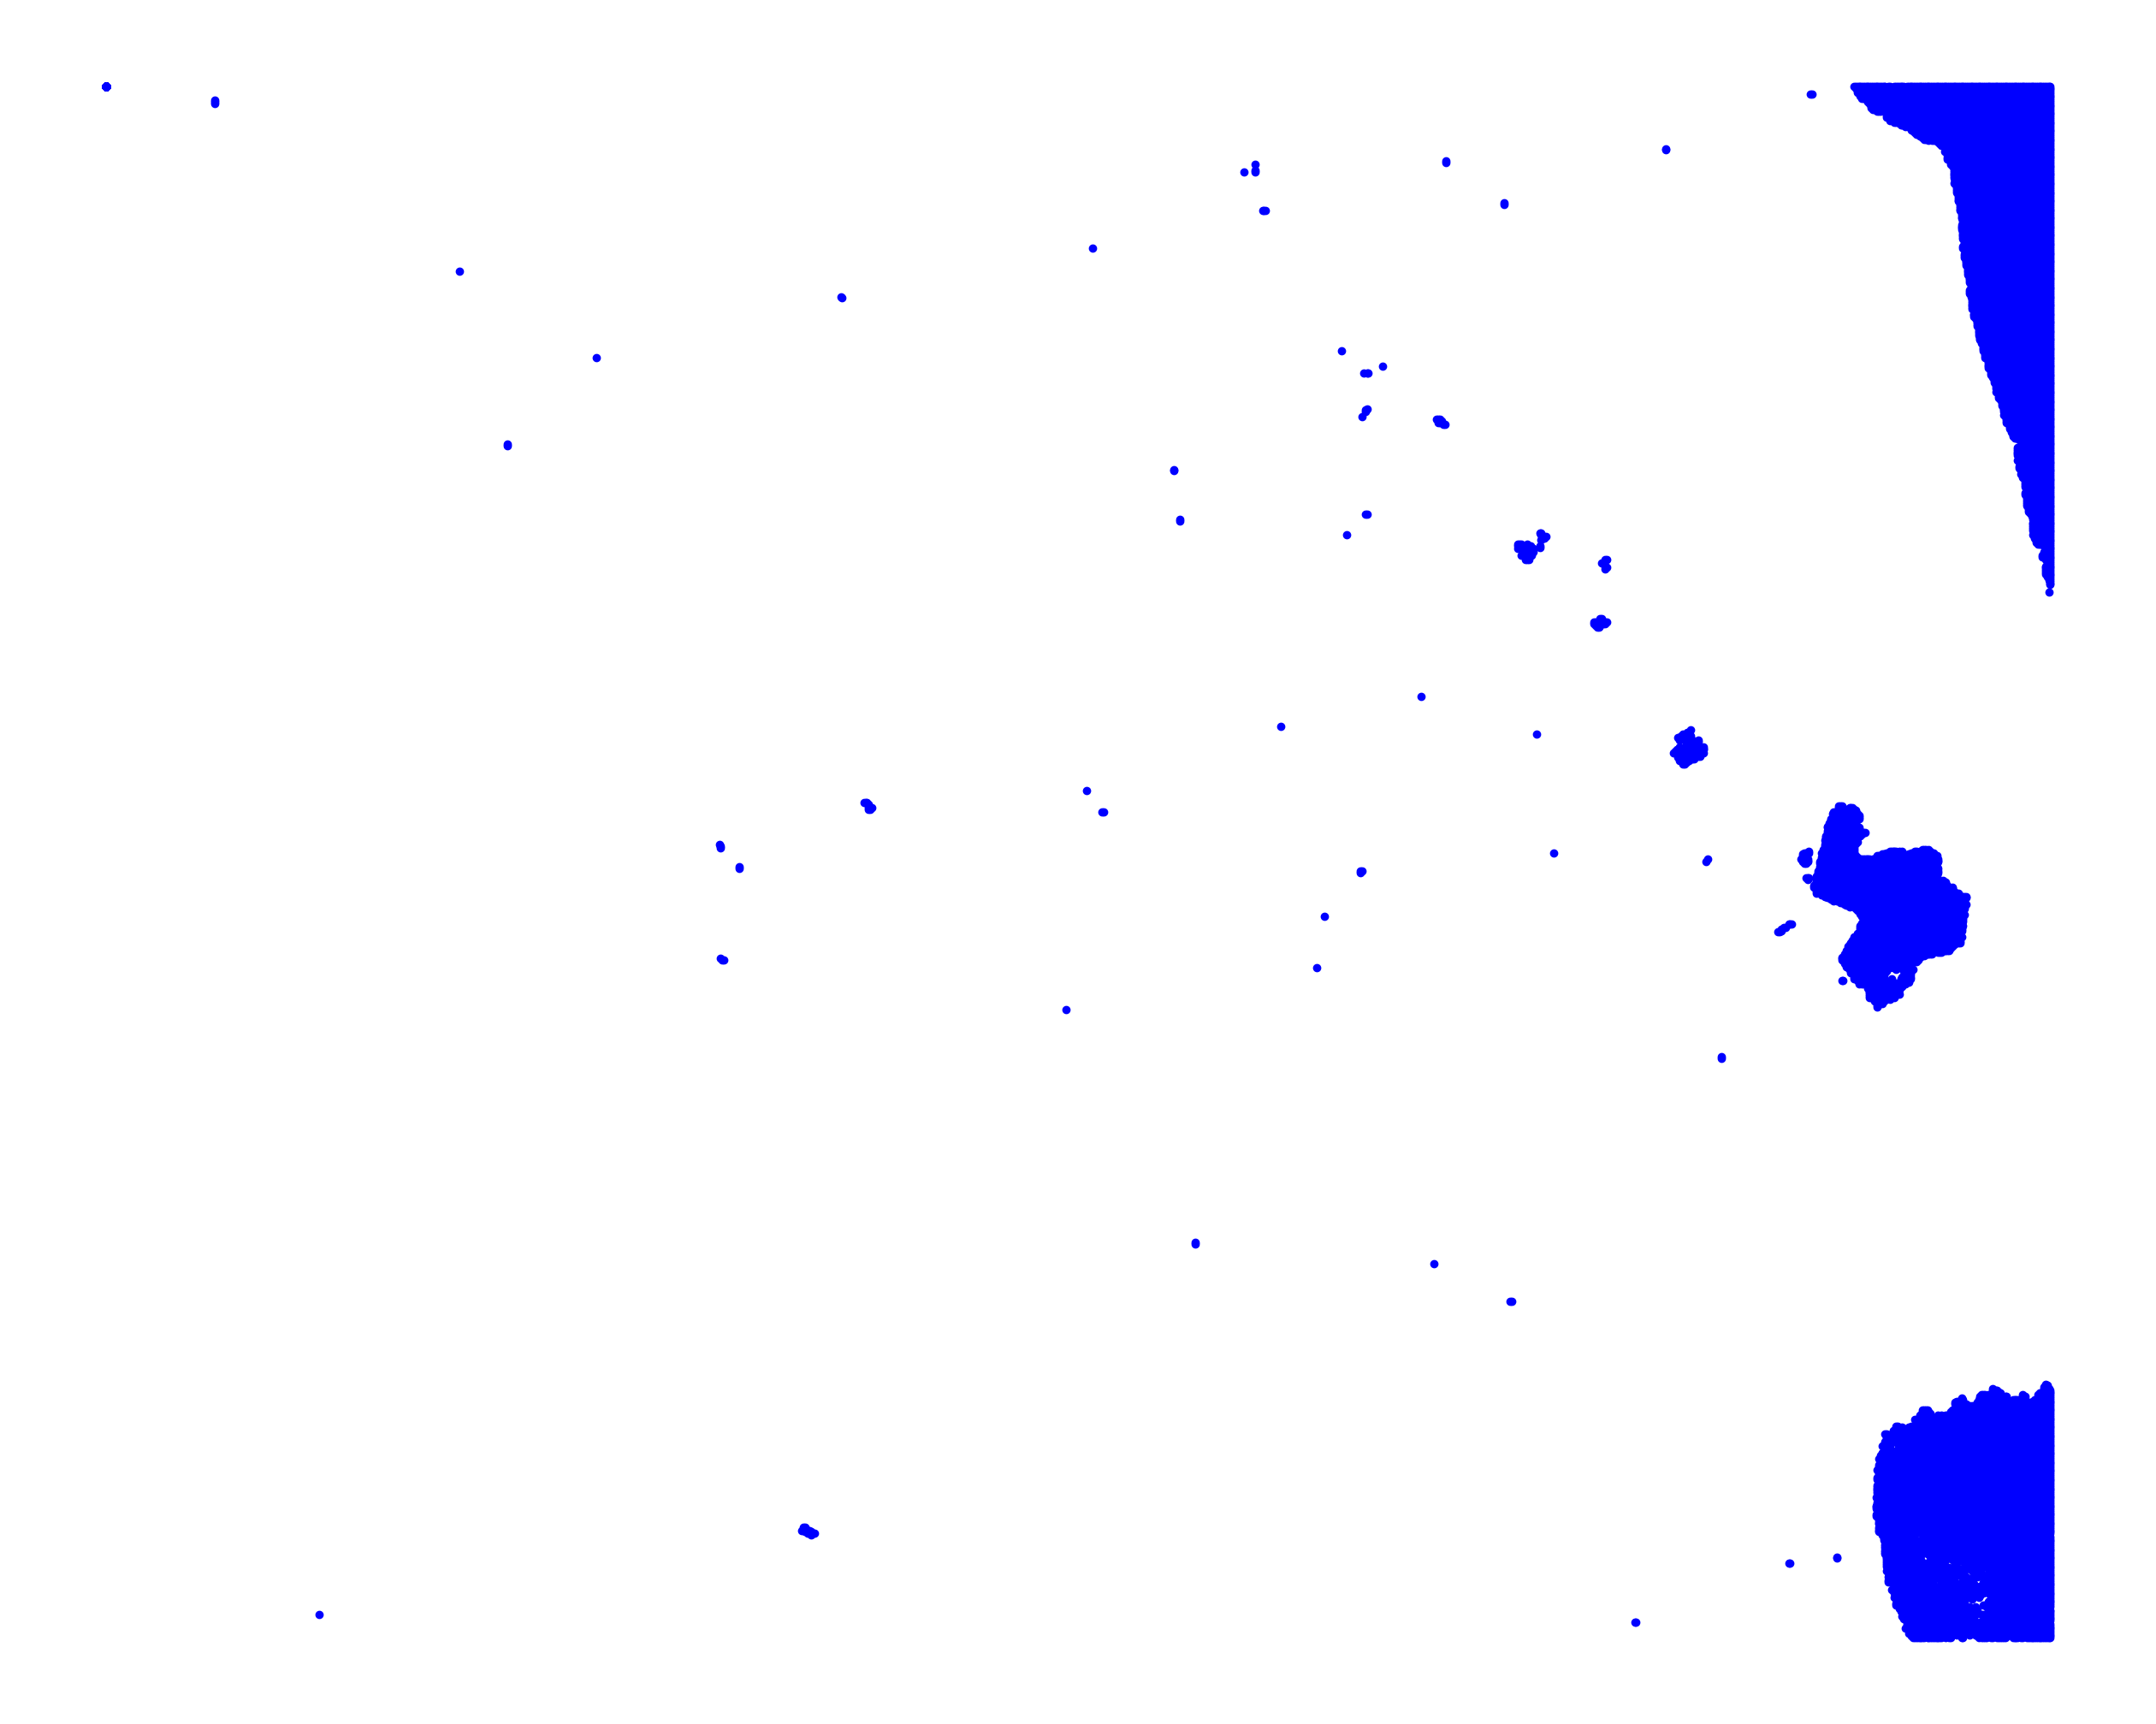

In [22]:
show=False

fig, ax = plt.subplots(figsize=(25,19.95) if not show else (10, 10))
# Plot the blue pixel positions
ax.scatter(X_water_pre, Y_water_pre, c='blue')
# Rotate the plot counterclockwise by 180 degrees
plt.axis('off')
# Invert the x-axis
plt.gca().invert_xaxis()  # Invert the x-axis
# Rotate the image 180 degrees
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.axis('off')

# Remove the white border
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the plot without the white border
plt.savefig('std_part_1_2023-06-27_water_pre.png', facecolor='#8B4513', bbox_inches='tight', pad_inches=0)

In [24]:
X_water_post = []
Y_water_post = []


for y in range(gray_image_post.shape[0]):
    for x in range(gray_image_post.shape[1]):

        # Check if the pixel than the threshold, you can change the threshold to test each time 
        if (gray_image_post[y, x]  < std_post).all():
            
            X_water_post.append(x)
            Y_water_post.append(y)
        else:
            #intensity_values_pixels.append(0)
            X_water_post.append(0)
            Y_water_post.append(0)

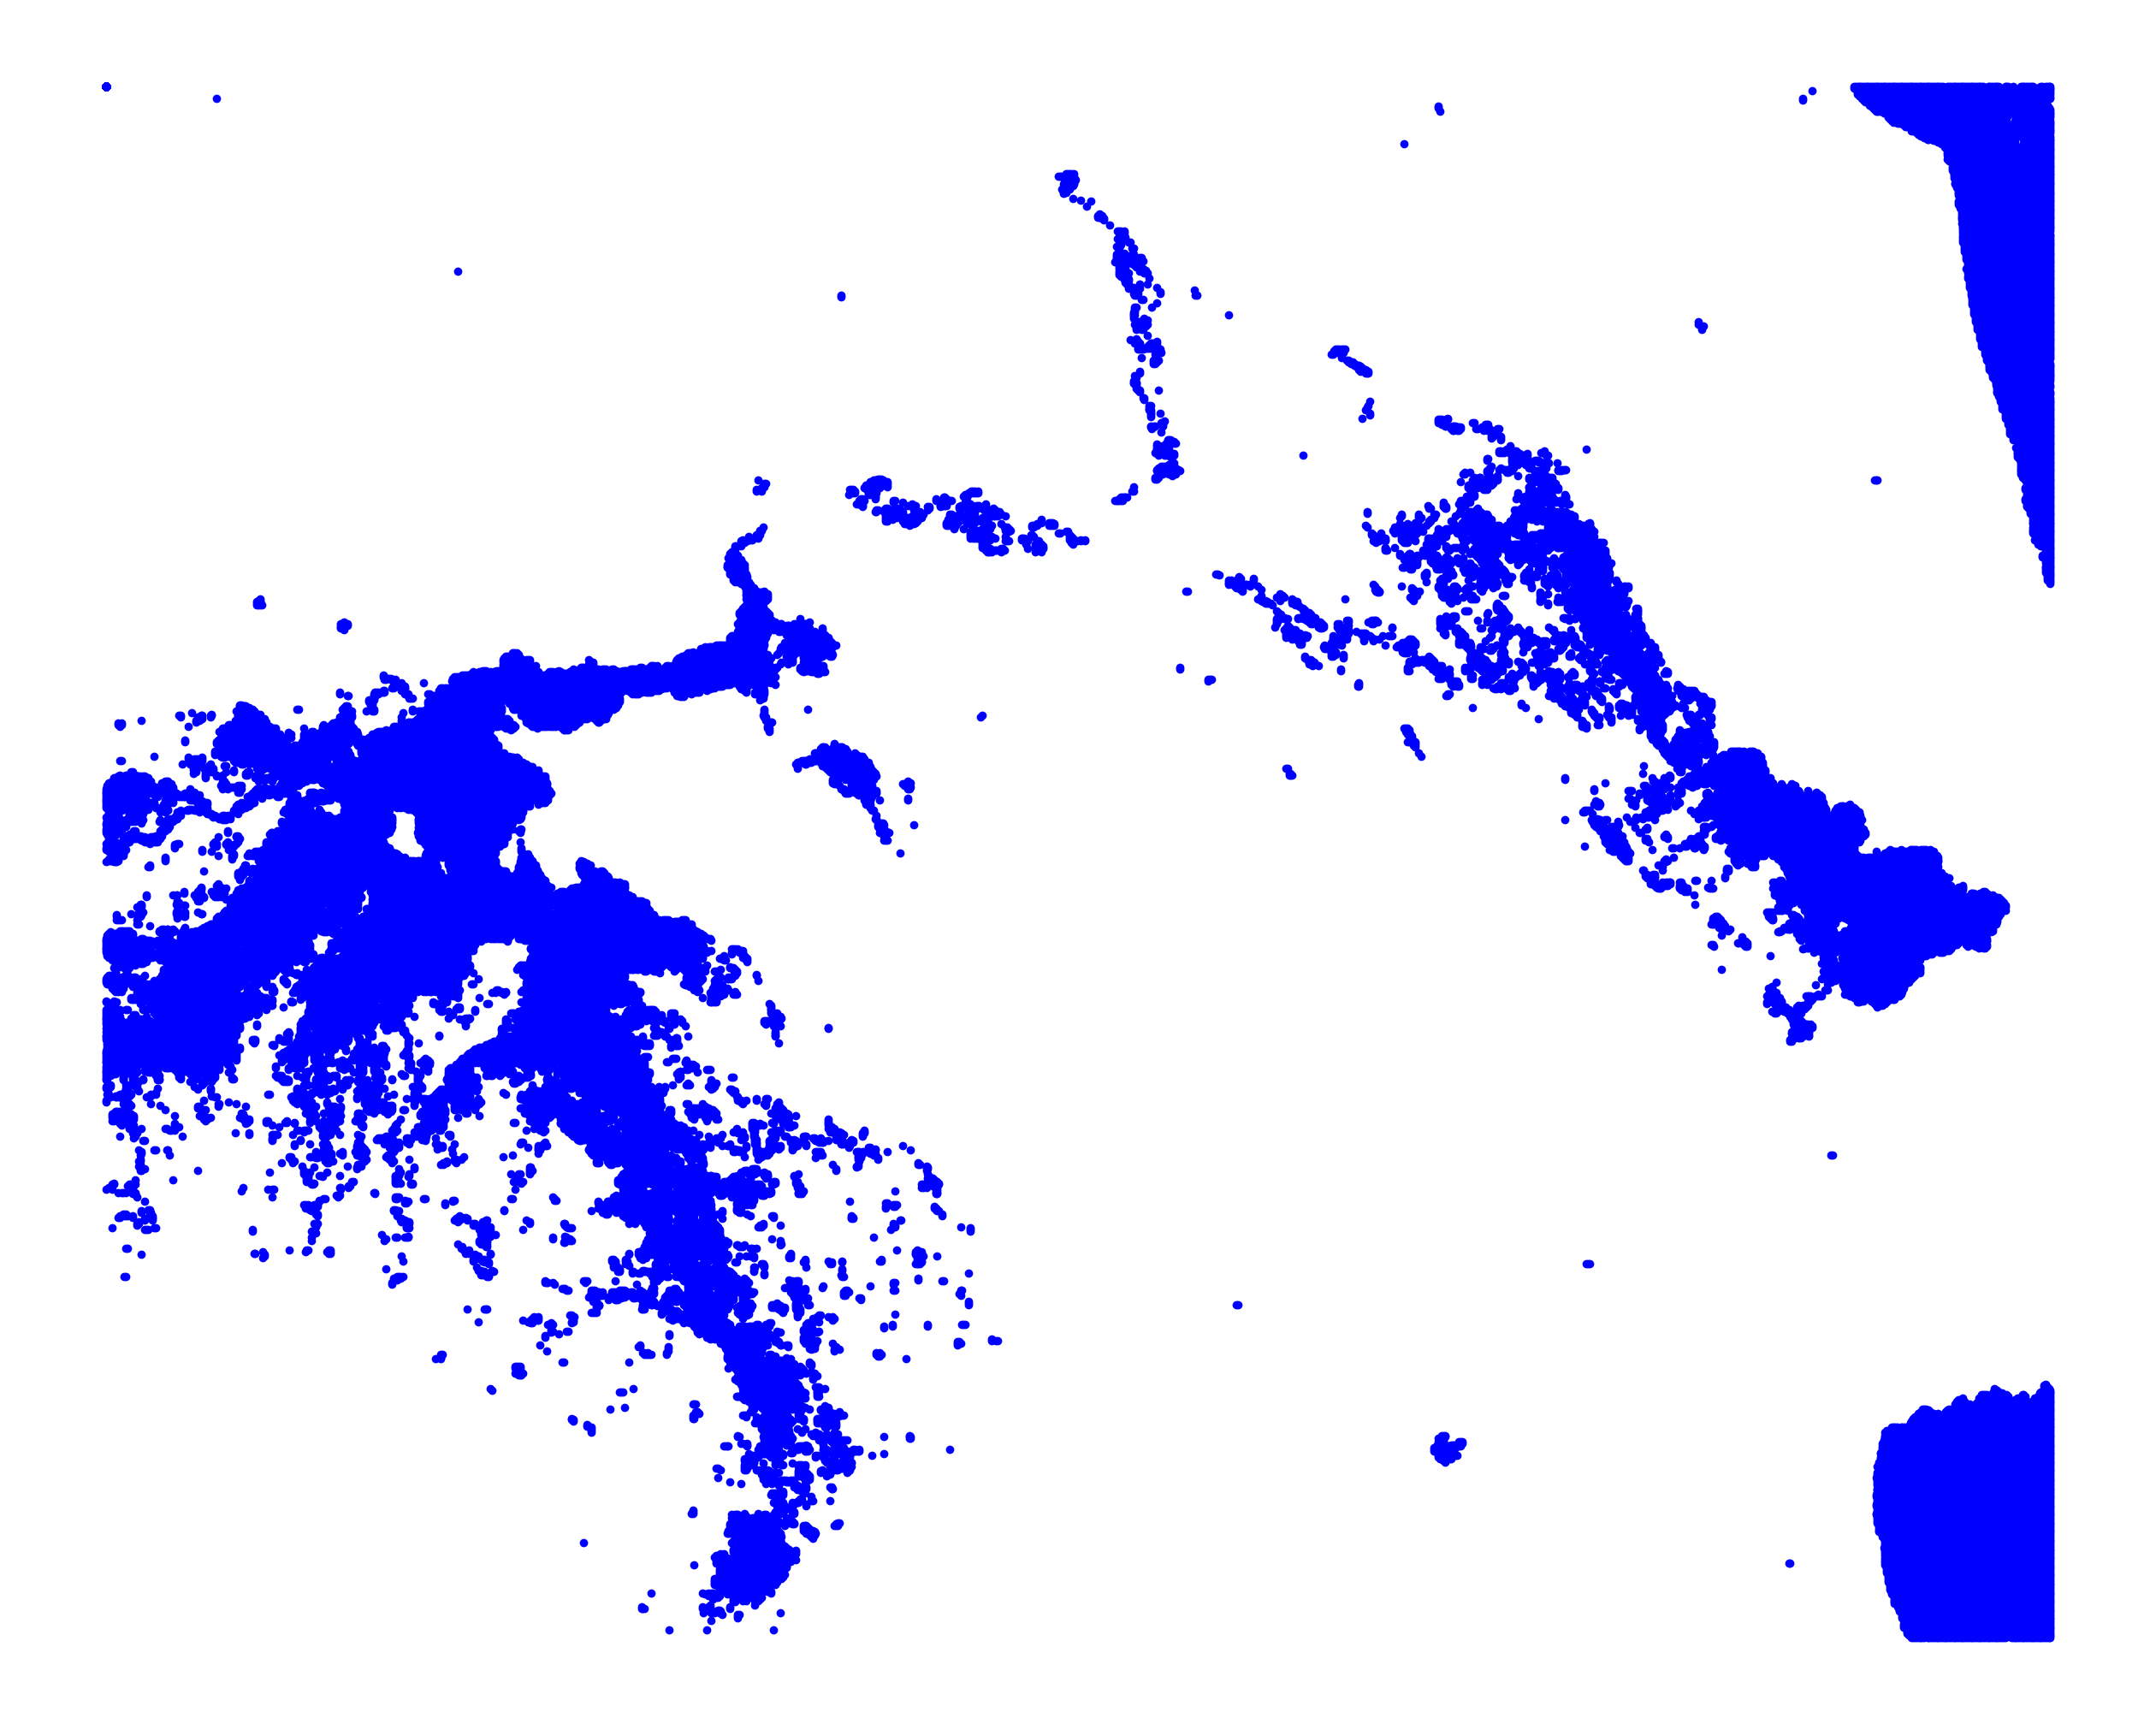

In [25]:
show=False

fig, ax = plt.subplots(figsize=( 25,19.95)if not show else (20, 20))
# Plot the blue pixel positions
ax.scatter(X_water_post, Y_water_post, c='blue')
# Rotate the plot counterclockwise by 180 degrees
plt.axis('off')
# Invert the x-axis
plt.gca().invert_xaxis()  # Invert the x-axis
# Rotate the image 180 degrees
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.axis('off')

# Remove the white border
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)



# Save the plot without the white border
plt.savefig('std_part_1_2023-09-07_water_post.png', facecolor='#8B4513', bbox_inches='tight', pad_inches=0)

Plot the thresholds 

In [23]:
fig, ax = plt.subplots(figsize=(50,50))

# Calculate the histogram
hist_post = cv2.calcHist([gray_image_post], [0], None, [256], [0, 256])

# Plot the histogram
plt.hist(gray_image_post.ravel(), bins=256, color='grey', alpha=0.7)
plt.xlim(1, 256)

# Draw vertical lines
plt.axvline(x=51.3, color='red', linestyle="--", linewidth=20, label='Standard Deviation')
plt.axvline(x=139, color='green', linestyle="--", linewidth=20, label='Threshold minimum')
plt.axvline(x=1, color='blue', linestyle="--", linewidth=20, label='Triangle')
plt.axvline(x=93, color='grey', linestyle="--", linewidth=20, label='Otsu')

plt.legend(fontsize=70)

# Set the title, labels, and legend
plt.xlabel('Digital Number', fontsize=100)
plt.ylabel('Frequency', fontsize=100)

plt.xticks(fontsize=70)  # Increase the font size of x-axis tick labels
plt.yticks(fontsize=70)  # Increase the font size of y-axis tick labels


# Show the plot
#plt.show()
plt.savefig('histogram_plot.png')
plt.close()

In [ ]:
hist_post = cv2.calcHist([gray_image_post], [0], None, [256], [0, 256])
fig, ax = plt.subplots(figsize=(15, 3))
plt.bar(range(256), hist_post.ravel(), color='grey', alpha=0.7)

ax.axvspan(xmin=-40.0, xmax=51,3, alpha=0.25, color="green", label="Water")
ax.axvspan(xmin=threshold_vh,
           xmax=-5,
           alpha=0.25,
           color="red",
           label="Not Water")
plt.legend()
plt.title('Image Histogram')
plt.xlabel('Grey level value')
plt.ylabel('Frequency')
plt.show()